Follow me on Twitter 🐦, connect with me on LinkedIn 🔗, and check out my GitHub 🐙. You won't be disappointed!

👉 Twitter: https://twitter.com/NdiranguMuturi1?t=xXF2OKsqOUeb5J_4yysFKg&s=09

👉 LinkedIn: https://www.linkedin.com/in/isaac-muturi-3b6b2b237 

👉 GitHub: https://github.com/Isaac-Ndirangu-Muturi-749


# <font color='green' size='6'>Exploring Titanic Dataset: Data Cleaning, Feature Engineering, and In-Depth Analysis</font>


![titanic](images/titanicimage.jpg)

# INTRODUCTION 

Welcome to this data exploration journey where we dive deep into the iconic Titanic dataset! In this notebook, we will embark on a comprehensive exploration of the Titanic dataset, uncovering valuable insights through data cleaning, feature engineering, and detailed analysis. The Titanic dataset has captivated the data science community for years, serving as an excellent platform to showcase the power of data manipulation and analysis.

Our adventure begins with an intricate cleaning process, where we'll meticulously handle missing values, identify and treat outliers, and remove unnecessary columns. Armed with a cleaner dataset, we will unleash the power of feature engineering, creating new features that encapsulate essential information from the original variables. These features, such as 'FamilySize', 'Title', and 'CabinType', will bring fresh perspectives to the data.

The heart of our exploration lies in the analysis phase, where we'll unravel fascinating patterns and trends hidden within the data. We'll examine survival rates across different variables, delve into the relationships between features, and even categorize age and fare ranges for enhanced analysis. Our insights will not only enlighten us about the Titanic's historical context but also demonstrate the art of thorough data investigation.

Through engaging visualizations and descriptive statistics, we'll explore the dataset's secrets and highlight the stories of the passengers who embarked on that fateful journey. By the end of this notebook, you'll witness the transformation of raw data into actionable insights, showcasing the power of data cleaning, feature engineering, and exploratory analysis.

So, fasten your seatbelt, and let's set sail on this data exploration adventure with the Titanic dataset!

# DATA UNDERSTANDING

## Data Loading and Initial Exploration
The code below demonstrates the loading of the dataset files and provides a glimpse into the initial rows of each dataset. This step allows us to verify the successful loading of data and get a sense of its structure.

In [1]:
import pandas as pd

# Load necessary libraries
import pandas as pd

def load_data(folder_path):
    """
    Load train, test, and gender submission data.
    
    Parameters:
        folder_path (str): Path to the folder containing the data files.
    
    Returns:
        train_data (pd.DataFrame): Loaded train data.
        test_data (pd.DataFrame): Loaded test data.
        gender_submission_data (pd.DataFrame): Loaded gender submission data.
    """
    # Load train.csv
    train_data = pd.read_csv(folder_path + 'train.csv')

    # Load test.csv
    test_data = pd.read_csv(folder_path + 'test.csv')

    # Load gender_submission.csv
    gender_submission_data = pd.read_csv(folder_path + 'gender_submission.csv')
    
    return train_data, test_data, gender_submission_data

def display_data(data, name):
    """
    Display the first few rows of a dataset.
    
    Parameters:
        data (pd.DataFrame): The dataset to be displayed.
        name (str): The name of the dataset.
    """
    print(f"{name} Data:")
    print(data.head())



In [2]:
# Define the folder path
folder_path = 'data/'

# Load the data using the function
train_data, test_data, gender_submission_data = load_data(folder_path)

In [3]:
# Display the loaded data using the function
display_data(train_data, "Train")

Train Data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN  

In [4]:
display_data(test_data, "Test")

Test Data:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [5]:
display_data(gender_submission_data, "Gender Submission")

Gender Submission Data:
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


## Exploring Column Names

In [6]:
train_columns = train_data.columns.tolist()
print(train_columns)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']




## Titanic Dataset Column Summary
**PassengerId**: Unique identifier for each passenger.  
**Survived**: Binary value indicating whether the passenger survived (1) or not (0).  
**Pclass**: Ticket class indicating the socio-economic status of the passenger (1st, 2nd, or 3rd class).  
**Name**: Full name of the passenger.  
**Sex**: Gender of the passenger (male or female).  
**Age**: Age of the passenger in years.  
**SibSp**: Number of siblings/spouses aboard the Titanic.  
**Parch**: Number of parents/children aboard the Titanic.  
**Ticket**: Ticket number.  
**Fare**: Passenger fare.  
**Cabin**: Cabin number where the passenger stayed.  
**Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).  


## Exploring Column Value Counts
In order to better understand the distribution of values within each column of the 'train_data' dataset, the following code snippet calculates and displays the value counts for each column:

In [7]:
column_value_counts = {}

for column in train_data.columns:
    column_value_counts[column] = train_data[column].value_counts()

for column, values in column_value_counts.items():
    print(f"Value Counts for Column '{column}':\n{values}\n")


Value Counts for Column 'PassengerId':
891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

Value Counts for Column 'Survived':
0    549
1    342
Name: Survived, dtype: int64

Value Counts for Column 'Pclass':
3    491
1    216
2    184
Name: Pclass, dtype: int64

Value Counts for Column 'Name':
Kimball, Mr. Edwin Nelson Jr         1
Byles, Rev. Thomas Roussel Davids    1
Fahlstrom, Mr. Arne Jonas            1
Baxter, Mr. Quigg Edmond             1
Zimmerman, Mr. Leo                   1
                                    ..
Abbing, Mr. Anthony                  1
Duane, Mr. Frank                     1
Pavlovic, Mr. Stefo                  1
Smith, Mr. Thomas                    1
Asplund, Miss. Lillian Gertrud       1
Name: Name, Length: 891, dtype: int64

Value Counts for Column 'Sex':
male      577
female    314
Name: Sex, dtype: int64

Value Counts for Column 'Age':
24.00    30
22.00    27
18.0

Here are the value counts for each column in the train_data DataFrame:

**PassengerId**: Each PassengerId appears only once, indicating a unique identifier for each passenger.  
**Survived**: 549 passengers did not survive (0), while 342 passengers survived (1).  
**Pclass**: 491 passengers were in Pclass 3, 216 in Pclass 1, and 184 in Pclass 2.  
**Name**: Each passenger's name is unique, with no duplicate names.  
**Sex**: 577 passengers are male and 314 are female.  
**Age**: The age distribution varies, with some ages repeated multiple times.  
**SibSp**: 608 passengers had no siblings/spouses onboard, 209 had 1, and others had more.  
**Parch**: 678 passengers had no parents/children onboard, 118 had 1, and others had more.  
**Ticket**: There are 681 unique ticket values, some of which repeat.  
**Fare**: Fare values vary, with some repeating.  
**Cabin**: There are 147 unique cabin values, with some repeating.  
**Embarked**: 644 passengers embarked from S (Southampton), 168 from C (Cherbourg), and 77 from Q (Queenstown).  

## Dataset Information and Summary Statistics

In [8]:
# Display general information about the dataset
train_data.info()

# Display summary statistics of the numerical columns
train_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Based on the provided information and summary statistics:

The dataset contains 891 entries.   
The columns 'Age', 'Cabin', and 'Embarked' have missing values.   
The average age of passengers is around 29.7 years, with a minimum age of 0.42 and a maximum age of 80.  
The survival rate ('Survived') indicates that about 38% of passengers survived.  
The majority of passengers were in Class 3 ('Pclass'), followed by Class 1 and Class 2.  
The average fare paid by passengers is approximately 32.20 units, with fares ranging from 0 to 512.33 units.  
Most passengers did not travel with parents or children ('Parch') and did not have siblings or spouses ('SibSp') onboard.  
The 'Sex' column indicates that there were more male passengers (577) compared to female passengers (314).  
The 'Cabin' column has a high number of missing values, with only 204 out of 891 entries having cabin information.  
Most passengers embarked from Southampton ('S'), followed by Cherbourg ('C') and Queenstown ('Q').  

These findings provide an initial understanding of the dataset, its variables, and the general characteristics of the passengers on the Titanic. Further exploratory data analysis can help uncover more insights and patterns in the data.

## Visualizing Missing Values Percentage

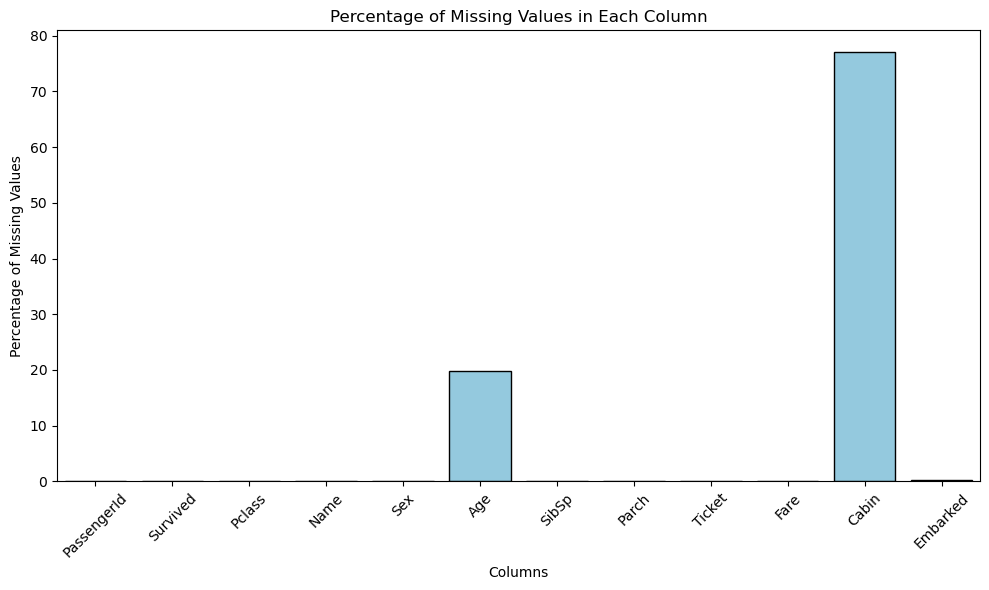

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_missing_data(data):
    """
    Visualize the percentage of missing values in each column of the dataset.
    
    Parameters:
        data (pd.DataFrame): The dataset to be visualized.
    """
    # Calculate the percentage of missing values for each column
    missing_percentage = (data.isnull().sum() / len(data)) * 100
    
    # Create a bar chart to visualize the percentage of missing values
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_percentage.index, y=missing_percentage.values, color='skyblue', edgecolor='black')
    plt.xlabel('Columns')
    plt.ylabel('Percentage of Missing Values')
    plt.title('Percentage of Missing Values in Each Column')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Visualize missing data using the function
visualize_missing_data(train_data)


## Visualizing Duplicate Rows Distribution

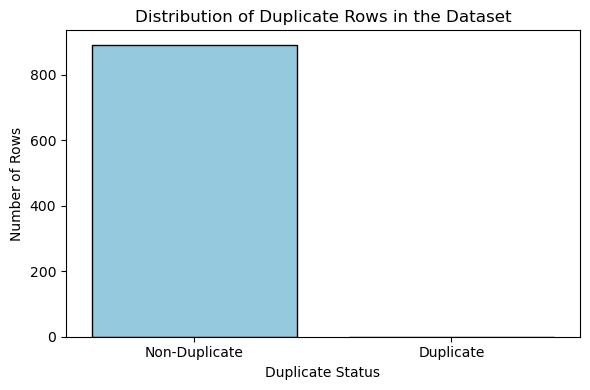

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_duplicates(data):
    """
    Visualize the distribution of duplicate rows in the dataset.
    
    Parameters:
        data (pd.DataFrame): The dataset to be visualized.
    """
    # Check for duplicate rows
    duplicates = data.duplicated().sum()
    
    # Create a bar chart to visualize the distribution of duplicates
    plt.figure(figsize=(6, 4))
    sns.barplot(x=['Non-Duplicate', 'Duplicate'], y=[len(data) - duplicates, duplicates], color='skyblue', edgecolor='black')
    plt.xlabel('Duplicate Status')
    plt.ylabel('Number of Rows')
    plt.title('Distribution of Duplicate Rows in the Dataset')
    plt.tight_layout()
    plt.show()

# Visualize duplicate rows using the function
visualize_duplicates(train_data)


## Count of Data Types in the Dataset

In [11]:
import pandas as pd

# Load the dataset
data = pd.read_csv('data/train.csv')

# Group columns by data type and count
data_type_counts = data.dtypes.value_counts()

# Print the count of each data type
print(data_type_counts)


object     5
int64      5
float64    2
dtype: int64


## Count of Unique Values in Different Data Types

In [12]:
import pandas as pd

# Group columns by data type
data_types = train_data.dtypes

# Separate columns by data type
int_columns = data_types[data_types == 'int64'].index
float_columns = data_types[data_types == 'float64'].index
object_columns = data_types[data_types == 'object'].index

# Print columns and their counts for each data type
print("Integer Columns:")
print(train_data[int_columns].nunique())

print("\nFloat Columns:")
print(train_data[float_columns].nunique())

print("\nObject Columns:")
print(train_data[object_columns].nunique())


Integer Columns:
PassengerId    891
Survived         2
Pclass           3
SibSp            7
Parch            7
dtype: int64

Float Columns:
Age      88
Fare    248
dtype: int64

Object Columns:
Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64


# EXPLORATORY DATA ANALYSIS(EDA)

## UNIVARIATE ANALYSIS

performing univariate analysis on the Titanic dataset by visualizing the distribution of its features. We'll separate the categorical and continuous variables for analysis.

Categorical Variables:  

1. Survived  
2. Pclass  
3. Sex  
4. SibSp  
5. Parch  
6. Embarked 

Continuous Variables:  

1. Age  
2. Fare  

Let's create visualizations for each of these variables.

## Visualizing Feature Distributions

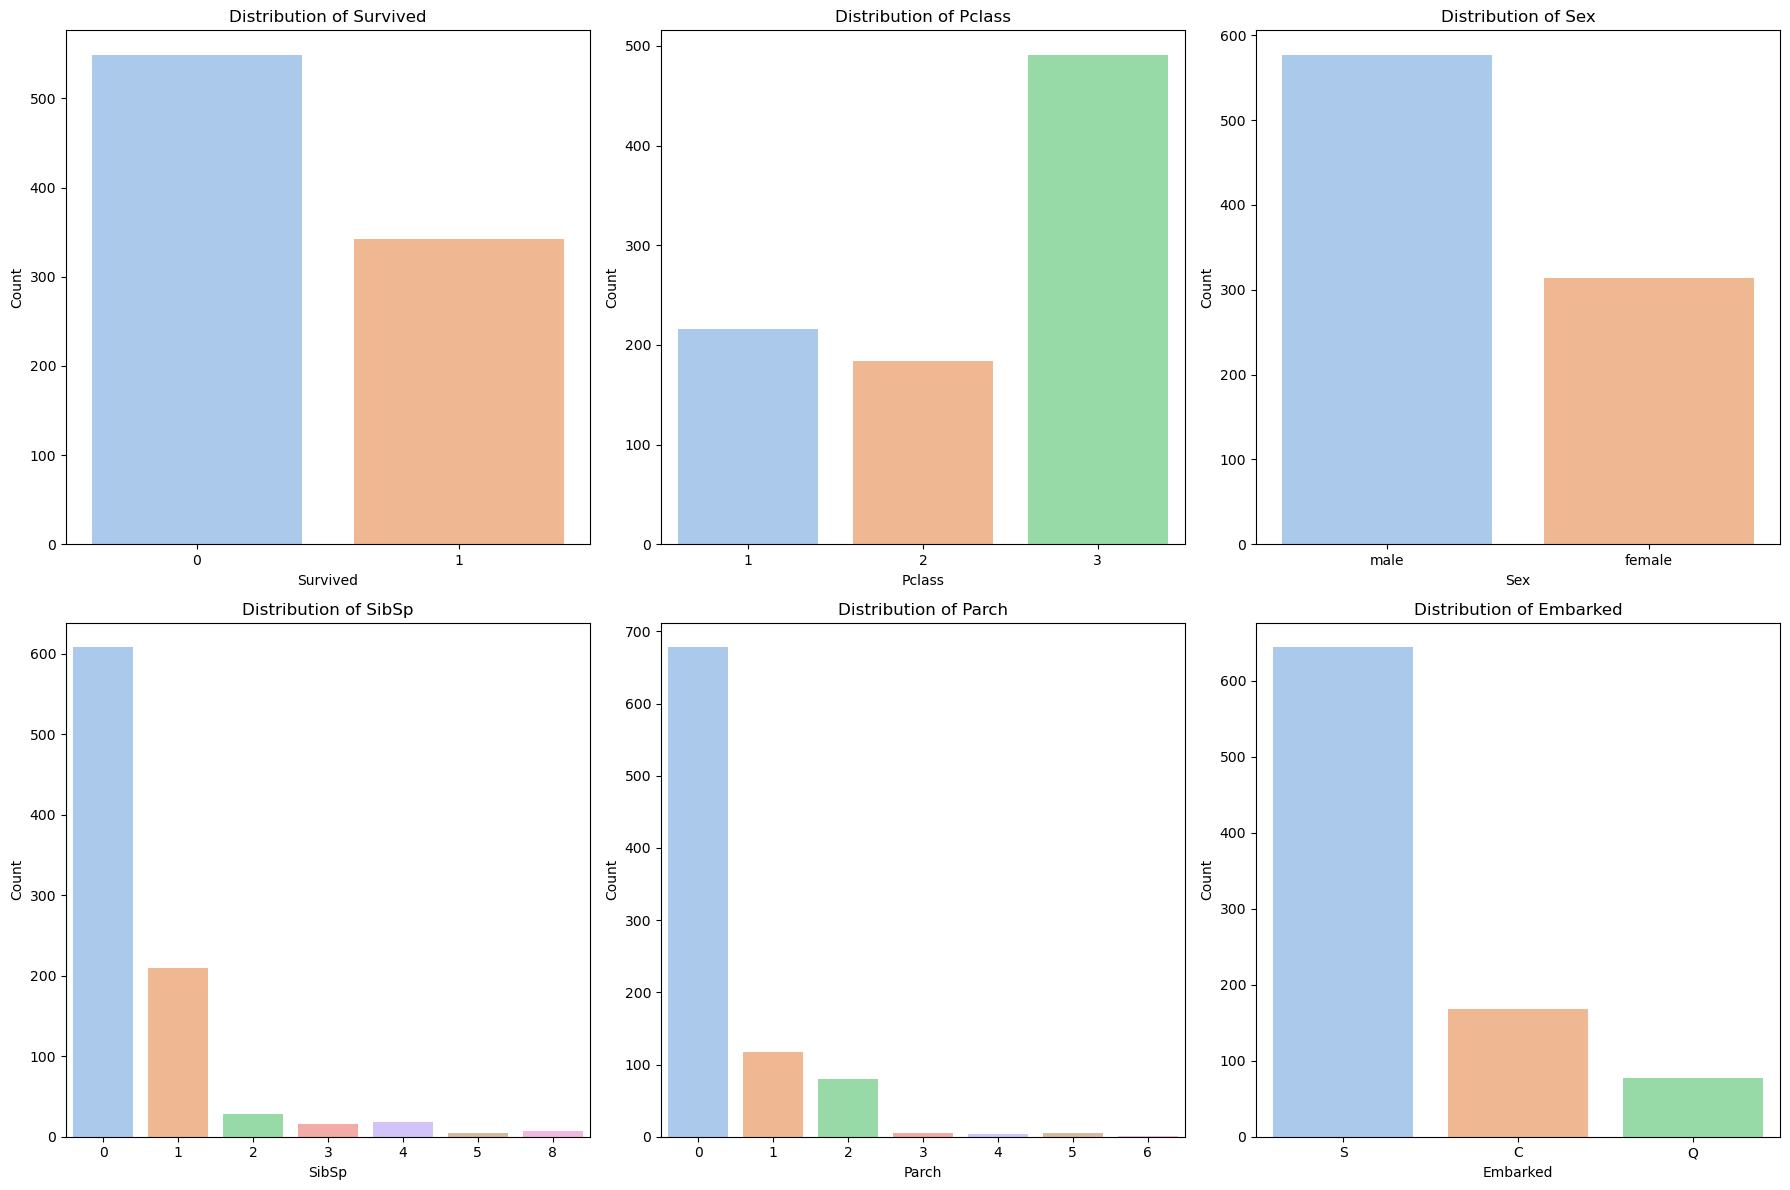

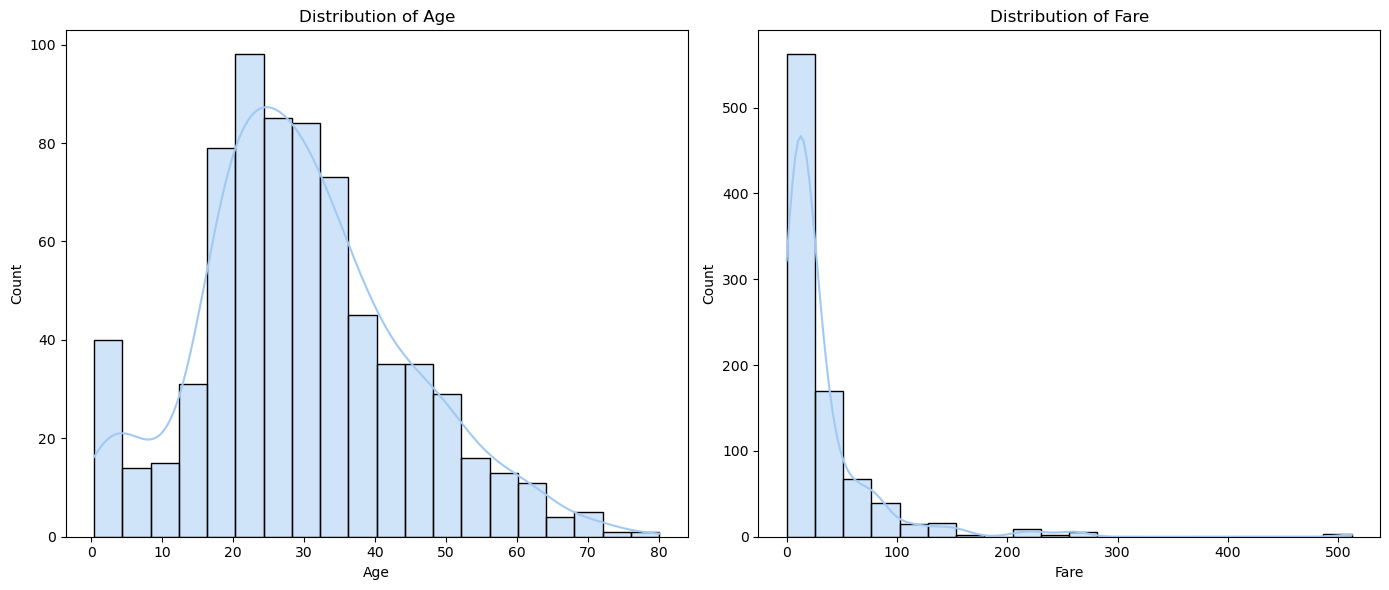

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

class TitanicDataVisualizer:
    def __init__(self, data):
        self.data = data
        self.categorical_vars = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
        self.continuous_vars = ['Age', 'Fare']
        sns.set_palette("pastel")

    def plot_categorical_distribution(self):
        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
        for ax, cat_var in zip(axes.flatten(), self.categorical_vars):
            sns.countplot(data=self.data, x=cat_var, ax=ax)
            ax.set_title(f'Distribution of {cat_var}')
            ax.set_ylabel('Count')
            ax.set_xlabel(cat_var)
        plt.tight_layout()
        plt.show()

    def plot_continuous_distribution(self):
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
        for ax, cont_var in zip(axes.flatten(), self.continuous_vars):
            sns.histplot(data=self.data, x=cont_var, bins=20, kde=True, ax=ax)
            ax.set_title(f'Distribution of {cont_var}')
            ax.set_ylabel('Count')
            ax.set_xlabel(cont_var)
        plt.tight_layout()
        plt.show()

# Create an instance of the TitanicDataVisualizer class
data_visualizer = TitanicDataVisualizer(train_data)

# Plot categorical distribution
data_visualizer.plot_categorical_distribution()

# Plot continuous distribution
data_visualizer.plot_continuous_distribution()



## BIVARIATE ANALYSIS

## Visualize the proportions of survivors for each feature's values

To visualize the proportions of survivors for each feature's values, we can create stacked bar plots for categorical variables.

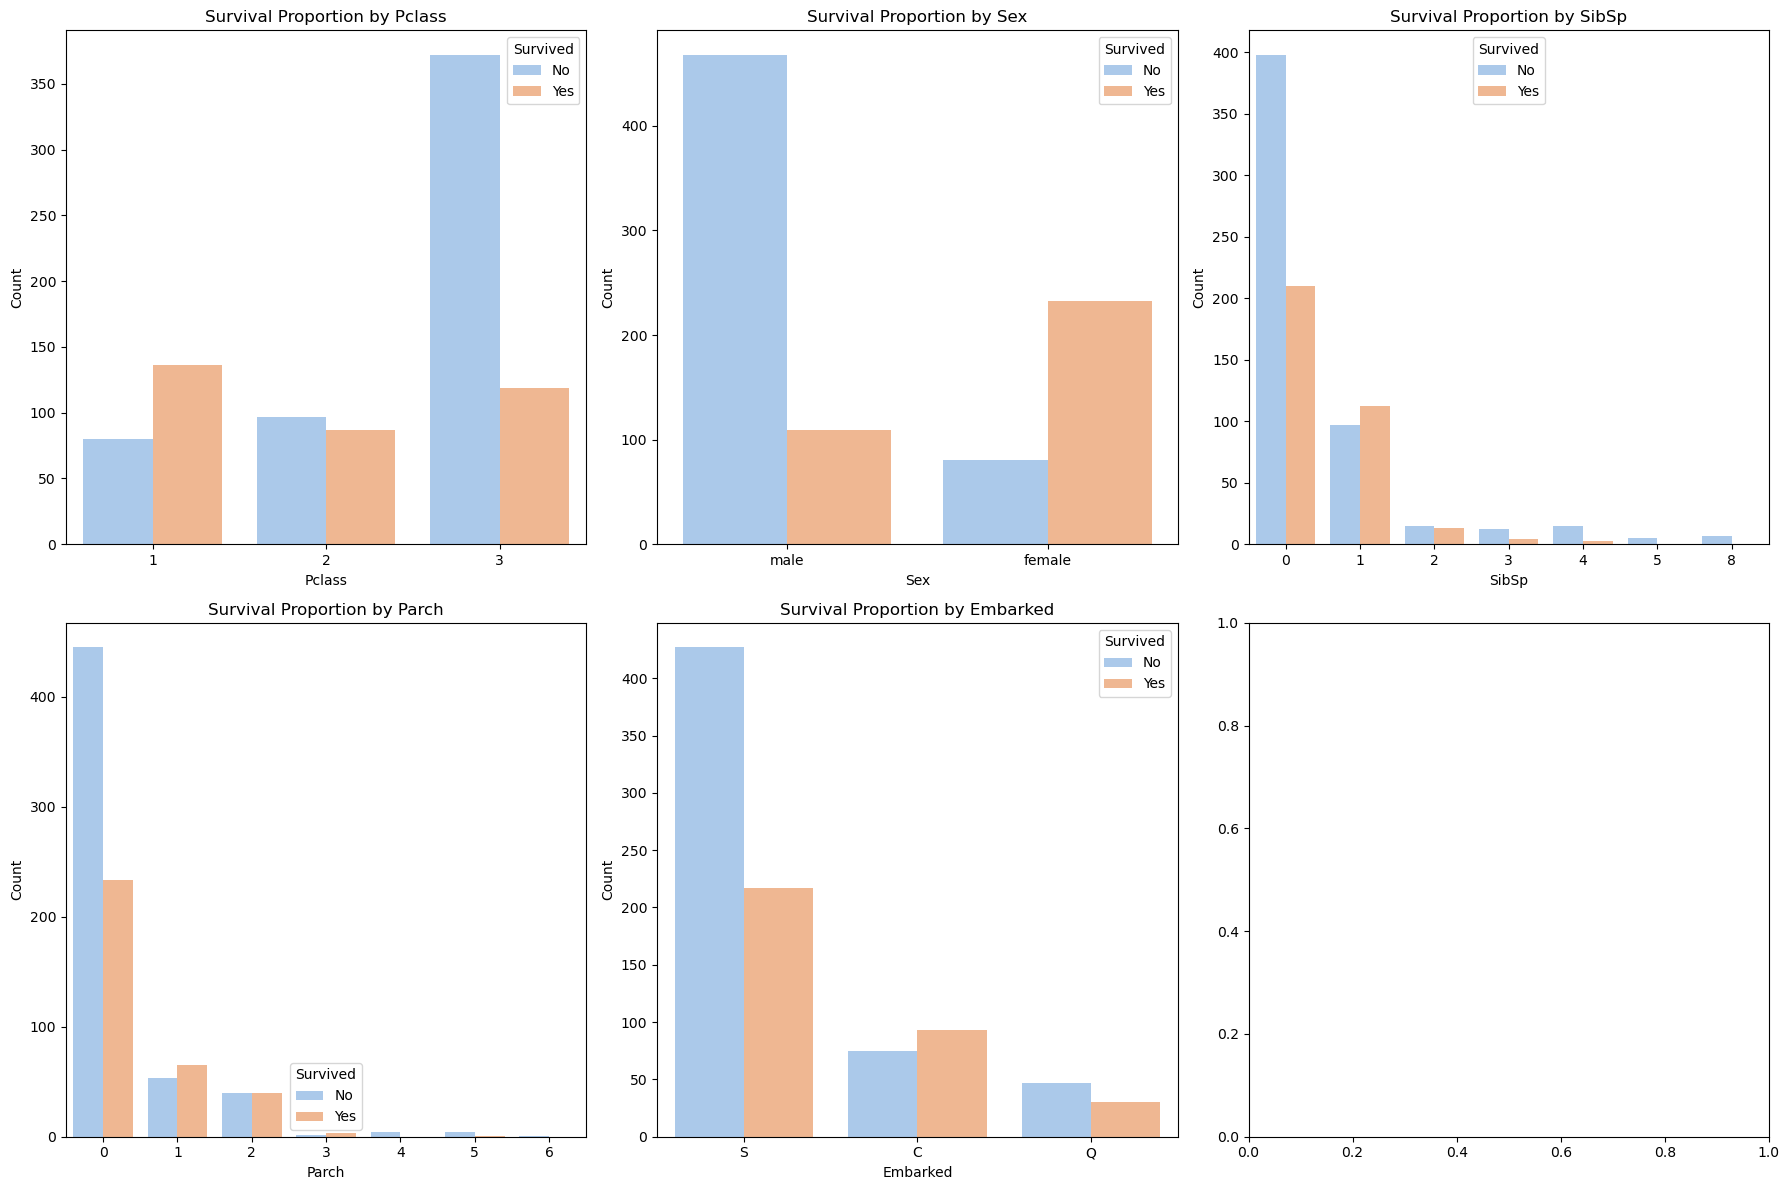

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

class SurvivalProportionVisualizer:
    def __init__(self, data, categorical_vars):
        self.data = data
        self.categorical_vars = categorical_vars
        sns.set_palette("pastel")

    def plot_survival_proportions(self):
        num_plots = len(self.categorical_vars)
        ncols = 3
        nrows = (num_plots + ncols - 1) // ncols

        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 12))
        for ax, cat_var in zip(axes.flatten(), self.categorical_vars):
            sns.countplot(data=self.data, x=cat_var, hue='Survived', ax=ax)
            ax.set_title(f'Survival Proportion by {cat_var}')
            ax.set_ylabel('Count')
            ax.set_xlabel(cat_var)
            ax.legend(title='Survived', labels=['No', 'Yes'])

        plt.tight_layout()
        plt.show()

# List of categorical variables
categorical_vars = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

# Create an instance of the SurvivalProportionVisualizer class
survival_visualizer = SurvivalProportionVisualizer(train_data, categorical_vars)

# Plot survival proportions
survival_visualizer.plot_survival_proportions()

## Survival Proportion by Categorical Variables

In [15]:
import pandas as pd
from tabulate import tabulate

def calculate_survival_proportions(data, group_by_column):
    survival_proportions = data.groupby(group_by_column)['Survived'].value_counts(normalize=True).unstack()
    survival_proportions.rename(columns={0: 'Not Survived', 1: 'Survived'}, inplace=True)
    survival_proportions['Total'] = survival_proportions.sum(axis=1)
    return survival_proportions

def display_survival_proportions_table(survival_proportions, group_by_name):
    print(f"Survival Proportions by {group_by_name}:")
    print(tabulate(survival_proportions, headers='keys', tablefmt='grid'))

# Grouping by Pclass and calculating survival proportions
pclass_survival = calculate_survival_proportions(train_data, 'Pclass')
display_survival_proportions_table(pclass_survival, 'Pclass')

# Grouping by Sex and calculating survival proportions
sex_survival = calculate_survival_proportions(train_data, 'Sex')
display_survival_proportions_table(sex_survival, 'Sex')

# Grouping by SibSp and calculating survival proportions
sibsp_survival = calculate_survival_proportions(train_data, 'SibSp')
display_survival_proportions_table(sibsp_survival, 'SibSp')

# Grouping by Parch and calculating survival proportions
parch_survival = calculate_survival_proportions(train_data, 'Parch')
display_survival_proportions_table(parch_survival, 'Parch')

# Grouping by Embarked and calculating survival proportions
embarked_survival = calculate_survival_proportions(train_data, 'Embarked')
display_survival_proportions_table(embarked_survival, 'Embarked')



Survival Proportions by Pclass:
+----------+----------------+------------+---------+
|   Pclass |   Not Survived |   Survived |   Total |
+==========+================+============+=========+
|        1 |       0.37037  |   0.62963  |       1 |
+----------+----------------+------------+---------+
|        2 |       0.527174 |   0.472826 |       1 |
+----------+----------------+------------+---------+
|        3 |       0.757637 |   0.242363 |       1 |
+----------+----------------+------------+---------+
Survival Proportions by Sex:
+--------+----------------+------------+---------+
| Sex    |   Not Survived |   Survived |   Total |
+========+================+============+=========+
| female |       0.257962 |   0.742038 |       1 |
+--------+----------------+------------+---------+
| male   |       0.811092 |   0.188908 |       1 |
+--------+----------------+------------+---------+
Survival Proportions by SibSp:
+---------+----------------+------------+---------+
|   SibSp |   Not Surv

Analyzing survivors based on age can provide insights into how different age groups were affected during the Titanic disaster. Let's visualize the survival proportions for different age groups. We'll first need to categorize the passengers into age groups and then calculate survival proportions within each group.

## Survival Proportions by Age Group

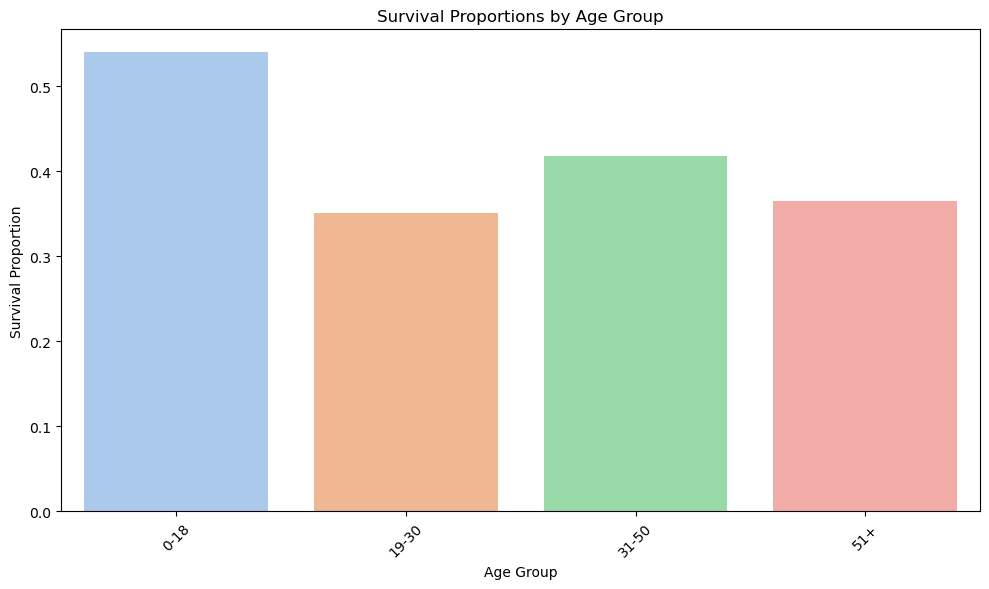

Survival Proportions by Age Group:
Survived  Not Survived  Survived
AgeGroup                        
0-18          0.460177  0.539823
19-30         0.649446  0.350554
31-50         0.582031  0.417969
51+           0.635135  0.364865


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_age_groups(data):
    # Categorize passengers into age groups
    bins = [0, 18, 30, 50, 100]
    labels = ['0-18', '19-30', '31-50', '51+']
    data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

    # Calculate survival proportions for each age group
    agegroup_survival = data.groupby('AgeGroup')['Survived'].value_counts(normalize=True).unstack()
    agegroup_survival.rename(columns={0: 'Not Survived', 1: 'Survived'}, inplace=True)

    # Plot the survival proportions for different age groups
    plt.figure(figsize=(10, 6))
    sns.barplot(data=agegroup_survival, x=agegroup_survival.index, y='Survived')
    plt.xlabel('Age Group')
    plt.ylabel('Survival Proportion')
    plt.title('Survival Proportions by Age Group')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Display survival proportions in numbers format
    print("Survival Proportions by Age Group:")
    print(agegroup_survival)

# Call the function with train_data
analyze_age_groups(train_data)


Analyzing survival based on gender is a crucial aspect of understanding the Titanic disaster, as the "women and children first" policy was followed during the evacuation. To analyze survival by gender, we'll calculate the survival proportions for male and female passengers and visualize them.

## Survival Proportions by Gender

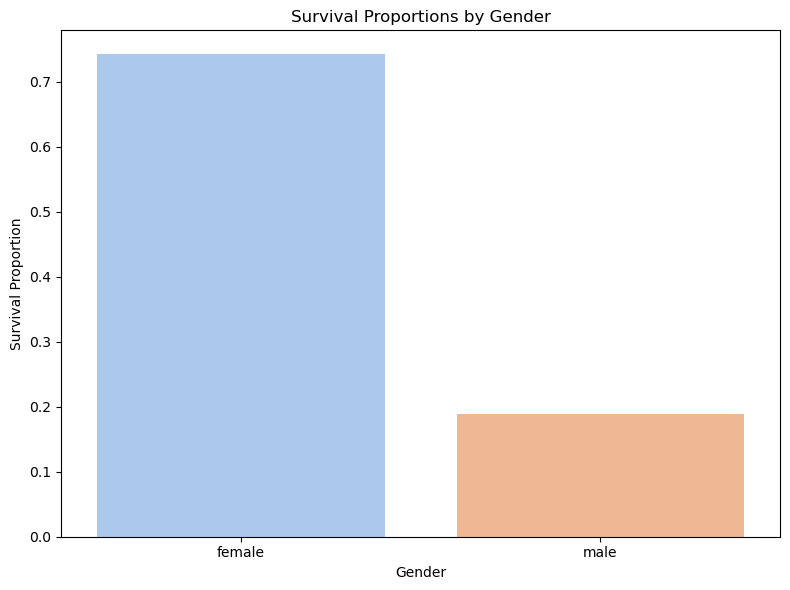

Survival Proportions by Gender:
Survived  Not Survived  Survived
Sex                             
female        0.257962  0.742038
male          0.811092  0.188908


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_gender_survival(data):
    # Calculate survival proportions by gender
    gender_survival = data.groupby('Sex')['Survived'].value_counts(normalize=True).unstack()
    gender_survival.rename(columns={0: 'Not Survived', 1: 'Survived'}, inplace=True)

    # Plot the survival proportions by gender
    plt.figure(figsize=(8, 6))
    sns.barplot(data=gender_survival, x=gender_survival.index, y='Survived')
    plt.xlabel('Gender')
    plt.ylabel('Survival Proportion')
    plt.title('Survival Proportions by Gender')
    plt.tight_layout()
    plt.show()

    # Display survival proportions by gender in numbers format
    print("Survival Proportions by Gender:")
    print(gender_survival)

# Call the function with train_data
analyze_gender_survival(train_data)


## Survival Proportions by Pclass, SibSp, and Parch

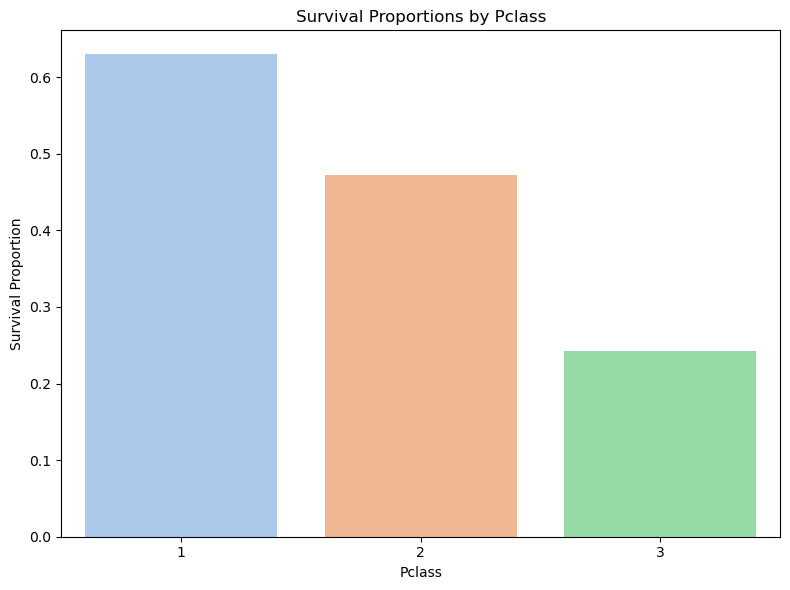

Survival Proportions by Pclass:
Survived  Not Survived  Survived
Pclass                          
1             0.370370  0.629630
2             0.527174  0.472826
3             0.757637  0.242363


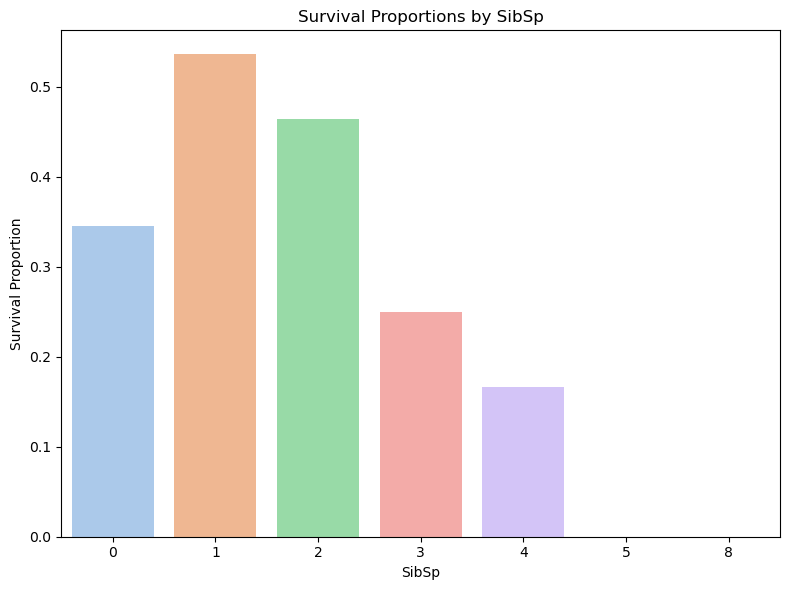

Survival Proportions by SibSp:
Survived  Not Survived  Survived
SibSp                           
0             0.654605  0.345395
1             0.464115  0.535885
2             0.535714  0.464286
3             0.750000  0.250000
4             0.833333  0.166667
5             1.000000       NaN
8             1.000000       NaN


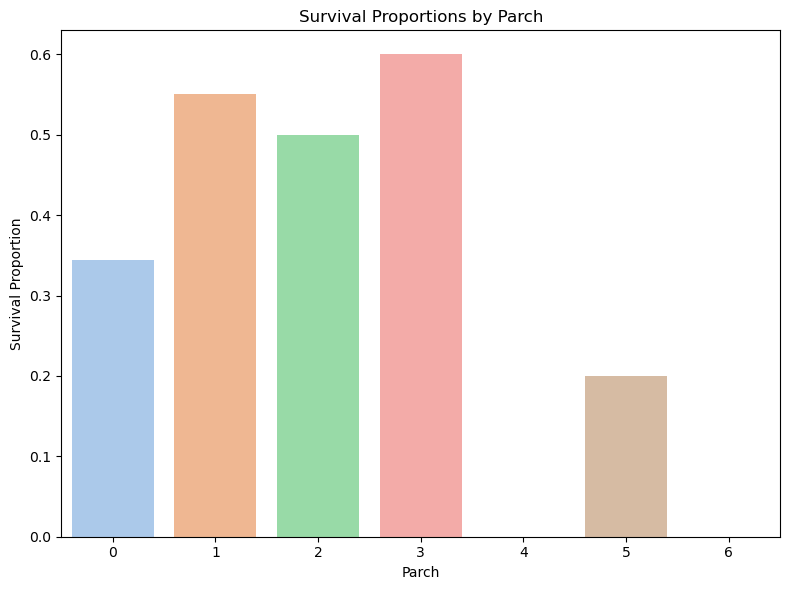

Survival Proportions by Parch:
Survived  Not Survived  Survived
Parch                           
0             0.656342  0.343658
1             0.449153  0.550847
2             0.500000  0.500000
3             0.400000  0.600000
4             1.000000       NaN
5             0.800000  0.200000
6             1.000000       NaN


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_group_survival(data, group_column, group_name):
    # Calculate survival proportions by the specified group column
    group_survival = data.groupby(group_column)['Survived'].value_counts(normalize=True).unstack()
    group_survival.rename(columns={0: 'Not Survived', 1: 'Survived'}, inplace=True)

    # Create subplots to display survival proportions
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.barplot(data=group_survival, x=group_survival.index, y='Survived', ax=ax)
    ax.set_xlabel(group_column)
    ax.set_ylabel('Survival Proportion')
    ax.set_title(f'Survival Proportions by {group_name}')
    plt.tight_layout()
    plt.show()

    # Display survival proportions in numbers format
    print(f"Survival Proportions by {group_name}:")
    print(group_survival)

# Call the function for Pclass, SibSp, and Parch
analyze_group_survival(train_data, 'Pclass', 'Pclass')
analyze_group_survival(train_data, 'SibSp', 'SibSp')
analyze_group_survival(train_data, 'Parch', 'Parch')


## MULTIVARIATE ANALYSIS

## Violin Plot: Survival by Age and Class
1. Survival by Age and Class:
We can use a violin plot to visualize the distribution of ages and classes for both survivors and non-survivors.

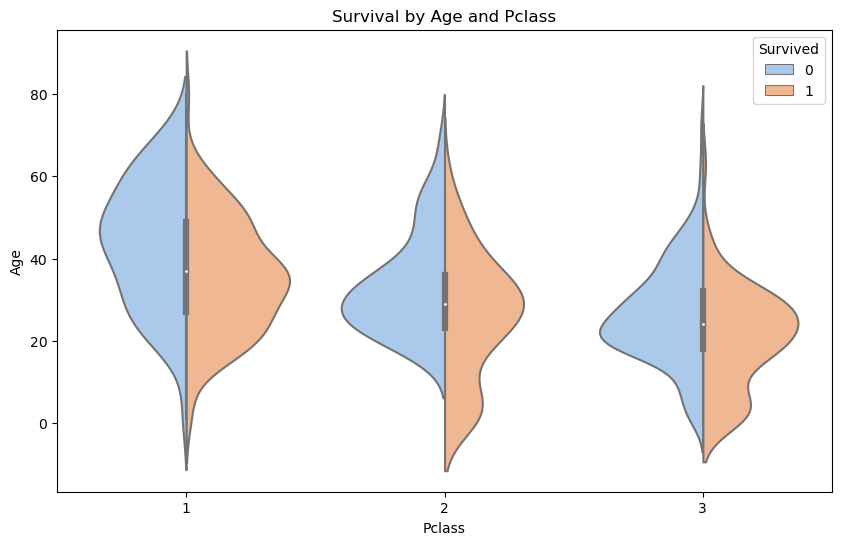

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_violin_survival(data, x_column, y_column, hue_column):
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=x_column, y=y_column, hue=hue_column, data=data, split=True)
    plt.title(f'Survival by {y_column} and {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

# Call the function to plot survival by Age and Class
plot_violin_survival(train_data, 'Pclass', 'Age', 'Survived')


## Bar Plot: Survival by Gender and Class
Let's visualize the survival rates based on both gender and class using a bar plot.

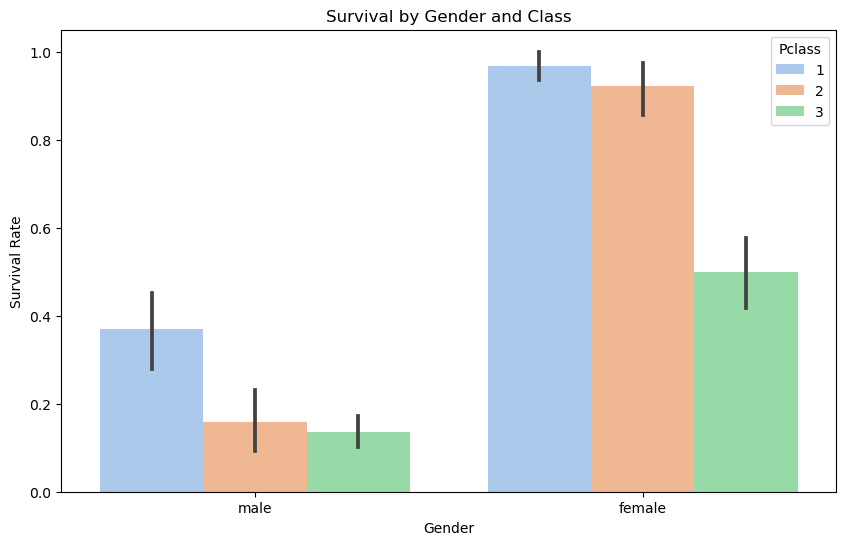

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_survival_by_gender_class(data):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Sex', y='Survived', hue='Pclass', data=data)
    plt.title('Survival by Gender and Class')
    plt.xlabel('Gender')
    plt.ylabel('Survival Rate')
    plt.show()

# Call the function to plot survival by Gender and Class
plot_survival_by_gender_class(train_data)


## Categorical Plot: Survival Rate by Embarked Port, Gender, and Class
We can create a multi-level categorical plot to analyze the survival rate based on the embarked port, class, and gender.

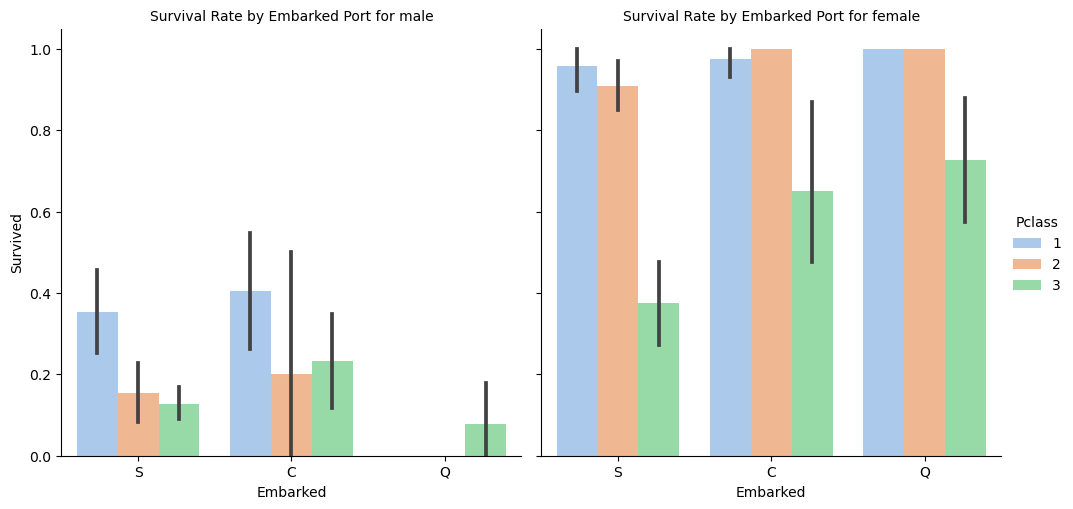

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_survival_by_embarked_port(data):
    g = sns.catplot(x='Embarked', y='Survived', hue='Pclass', col='Sex', data=data, kind='bar')
    g.set_titles("Survival Rate by Embarked Port for {col_name}")
    plt.show()

# Call the function to plot survival by Embarked Port for each gender and class
plot_survival_by_embarked_port(train_data)


## Value Counts of Titles" and "Distribution of Titles"

- **Mr:** Used to address adult men, regardless of marital status.
- **Mrs:** Used to address married women.
- **Miss:** Used to address unmarried women.
- **Rev:** Used for clergy members, especially in Christian denominations.
- **Ms:** A more neutral title that can be used for women regardless of marital status.
- **Dr.:** Used for individuals who hold a doctorate degree, such as medical doctors or PhD holders.
- **Lady:** A title of nobility used to address women of high rank or aristocratic status.
- **Master:** A title used for young boys, typically under the age of 18.
- **Don:** An honorific title used in Spanish and Italian cultures, often used to show respect for a male individual, particularly one with authority or expertise.
- **Mme (Madame):** A French title used to address a married woman. Similar to "Mrs." in English.
- **Ms.:** A neutral title that can be used for women regardless of marital status. It does not indicate whether a woman is married or not.
- **Major:** A military rank or title, usually above Captain and below Lieutenant Colonel.
- **Sir:** A polite and respectful form of address for a man. It can be used as a title of honor in various contexts.
- **Mlle (Mademoiselle):** A French title used to address an unmarried woman. Similar to "Miss" in English.
- **Col (Colonel):** A military rank, typically above Lieutenant Colonel and below Brigadier General.
- **Capt (Captain):** A military rank, typically above Lieutenant and below Major.
- **The Countess:** A title of nobility for a woman who holds the rank of Count or is married to a Count.


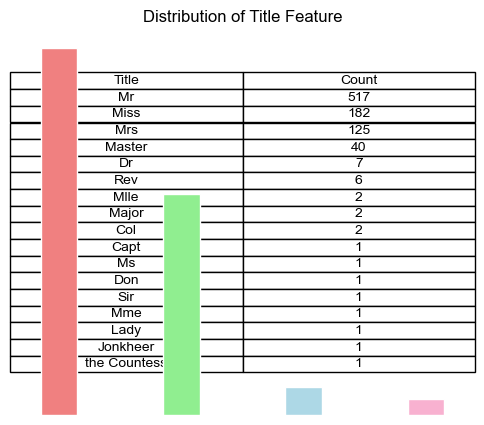

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class TitlesAnalyzer:
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
        self.extract_titles()
        
    def extract_titles(self):
        titles = [name.split(',')[1].split('.')[0].strip() for name in self.data['Name']]
        self.data['title'] = pd.Series(titles)
    
    def plot_value_counts_table(self, value_counts):
        fig, ax1 = plt.subplots(1, 1, figsize=(6, 5))
        cell_text = [[title, count] for title, count in value_counts.items()]
        ax1.table(cellText=cell_text, colLabels=['Title', 'Count'], cellLoc='center', loc='center')
        ax1.axis('off')
        ax1.set_title('Value Counts')
    
    def plot_count_plot(self, column):
        plt.figure(figsize=(8, 6))
        sns.countplot(data=self.data, x=column)
        plt.title('Count Plot')
        plt.xticks(rotation=40, ha='right')
    
    def replace_titles(self):
        self.data['title'] = self.data['title'].replace(
            ['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],
            'Rare'
        )
        self.data['title'] = self.data['title'].replace(['Miss','Ms','Mme','Mlle','Mrs'],'Miss/Ms/Mme/Mlle/Mrs')
    
    def plot_title_distribution(self):
        sns.set_theme(style="darkgrid")
        custom_palette = ["#F08080", "#90EE90", "#ADD8E6", "#F8B1D0"]
        self.data['title'].value_counts().plot(kind='bar', color=custom_palette, width=0.3)
        plt.title('Distribution of Title Feature')
        plt.xticks(rotation=0)
        plt.xlabel('')
        plt.ylabel('Count')
    
    def analyze_titles(self):
        # Calculate value counts and plot as a table
        value_counts = self.data['title'].value_counts()
        self.plot_value_counts_table(value_counts)

        # Replace titles according to specified values
        self.replace_titles()

        # Plot the distribution of title feature
        self.plot_title_distribution()

        plt.show()
    
    
# Create an instance of the TitanicAnalyzer class
analyzer = TitlesAnalyzer('data/train.csv')

# Analyze and visualize the data
analyzer.analyze_titles()


# DATA CLEANING AND FEATURE ENGINEERING

### Missing Values:  Imputation
We can handle missing values by either imputing them with appropriate values or removing the rows/columns containing missing data. Here's a general approach for each column:

1. **Age**: We can impute missing age values with the median age.
2. **Cabin**: Since a significant portion of cabin data is missing, we might consider dropping this column.
3. **Embarked**: We can impute the missing embarked port with the most common port.

In [23]:
def preprocess_data(data):
    # Impute Age with median
    data['Age'].fillna(data['Age'].median(), inplace=True)
    
    # Drop Cabin column
    data.drop('Cabin', axis=1, inplace=True)
    
    # Impute Embarked with mode
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
    
    return data

# Call the function to preprocess the train_data
train_data = preprocess_data(train_data)


## check for and remove any duplicate rows from the dataset

In [24]:
# Check for duplicates
duplicate_rows = train_data.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

# Remove duplicates
train_data = train_data[~duplicate_rows]


Number of duplicate rows: 0


## Detecting and handling outliers
We can use box plots to identify potential outliers in numeric columns like Age and Fare.

### Box Plots for Age and Fare
To detect outliers in the dataset, we can use box plots to visualize the distribution of numerical features and identify any data points that fall far from the median. Outliers can significantly impact the analysis and modeling, so it's important to identify and handle them appropriately. Let's use box plots to identify potential outliers in the 'Age' and 'Fare' columns.

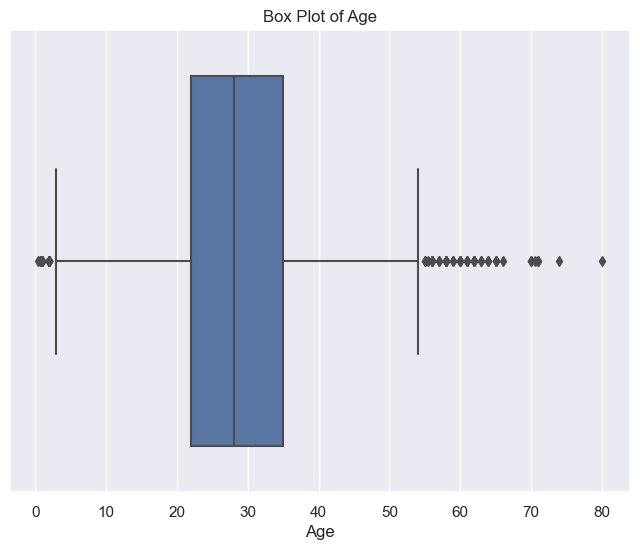

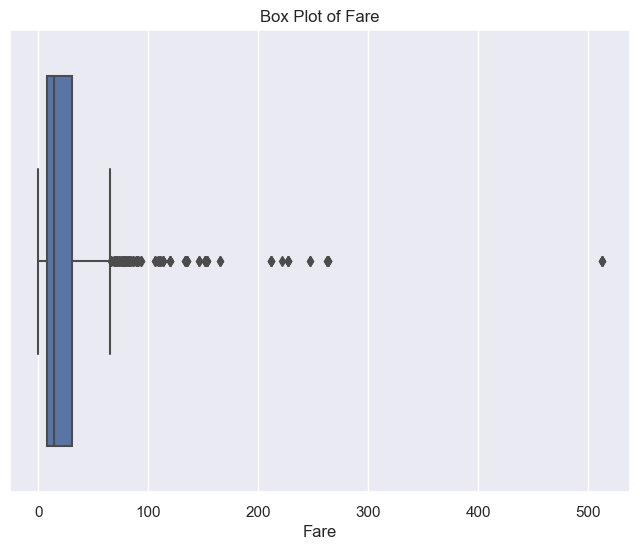

In [25]:
def plot_boxplot(data, column):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

# Call the function to plot box plots for Age and Fare
plot_boxplot(train_data, 'Age')
plot_boxplot(train_data, 'Fare')



### Applying winsorization to the 'Fare' column
Winsorization: Winsorization involves capping extreme values at a certain percentile. This can help mitigate the impact of extreme values without removing them entirely.

In [26]:
from scipy.stats.mstats import winsorize

def apply_winsorization(data, column, lower_limit, upper_limit):
    data[column] = winsorize(data[column], limits=[lower_limit, upper_limit])

# Apply winsorization to the Fare column
apply_winsorization(train_data, 'Fare', 0.05, 0.05)


### Analyzing survival proportions for each age group after binning the 'Age' column.
Binning or Categorization: Instead of treating extreme values as outliers, you can categorize or bin them into predefined ranges. This can help you analyze the data more effectively.

In [27]:
import pandas as pd

def create_age_group_column(data, age_column, bin_edges, bin_labels):
    data['AgeGroup'] = pd.cut(data[age_column], bins=bin_edges, labels=bin_labels)

# Define bin edges and labels for age groups
age_bin_edges = [0, 18, 30, 50, 100]
age_bin_labels = ['0-18', '19-30', '31-50', '51+']

# Create the 'AgeGroup' column and calculate survival proportions
create_age_group_column(train_data, 'Age', age_bin_edges, age_bin_labels)
age_group_survival = train_data.groupby('AgeGroup')['Survived'].mean()

print(age_group_survival)


AgeGroup
0-18     0.503597
19-30    0.331096
31-50    0.423237
51+      0.343750
Name: Survived, dtype: float64


## Binning or Categorization:  Visualization of the binning process for the 'Age' and 'Fare' columns using bar plots

Bin the 'Age' column into categories (e.g., child, young adult, adult, senior).
Bin the 'Fare' column into categories based on ranges.

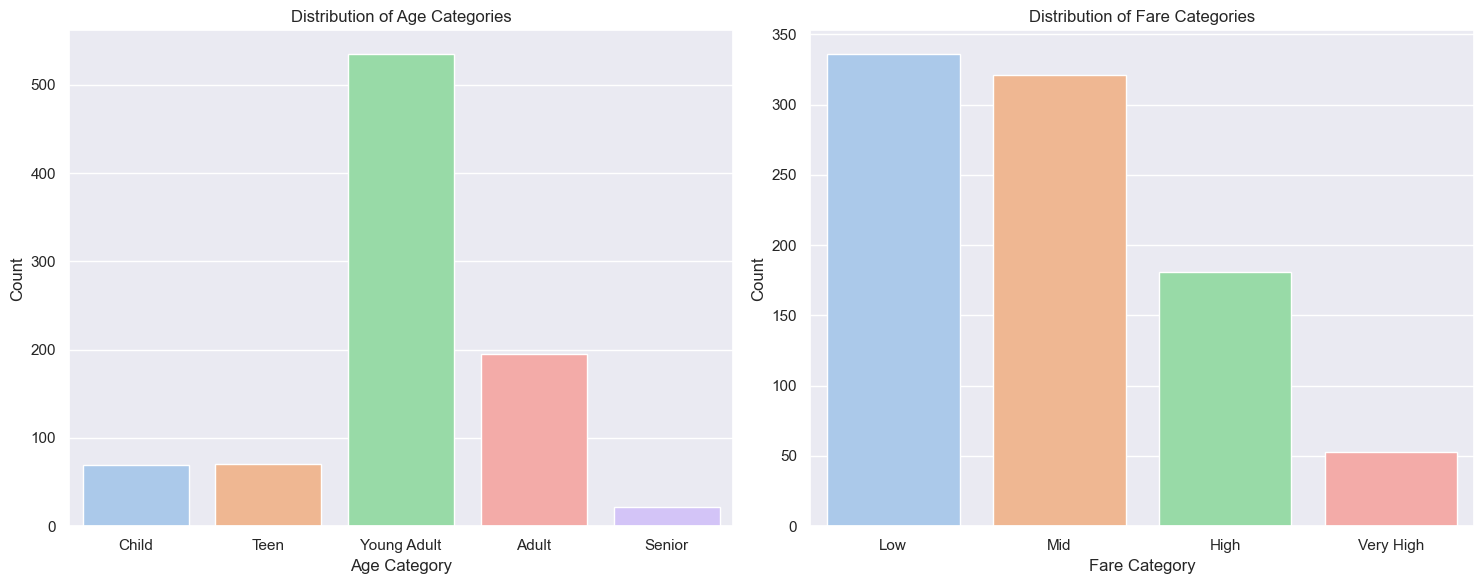

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def bin_age_and_fare(data):
    age_bins = [0, 12, 18, 35, 60, 100]
    age_labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
    data['Age_Category'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

    fare_bins = [-1, 10, 30, 100, 1000]
    fare_labels = ['Low', 'Mid', 'High', 'Very High']
    data['Fare_Category'] = pd.cut(data['Fare'], bins=fare_bins, labels=fare_labels)
    return data

def visualize_age_fare_categories(data):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    sns.set_palette("pastel")

    sns.countplot(data=data, x='Age_Category', ax=axes[0])
    axes[0].set_title('Distribution of Age Categories')
    axes[0].set_xlabel('Age Category')
    axes[0].set_ylabel('Count')

    sns.countplot(data=data, x='Fare_Category', ax=axes[1])
    axes[1].set_title('Distribution of Fare Categories')
    axes[1].set_xlabel('Fare Category')
    axes[1].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

# Bin Age and Fare columns
train_data = bin_age_and_fare(train_data)

# Visualize Age and Fare categories
visualize_age_fare_categories(train_data)


## Visualizing Feature Correlations with Heatmap

Analyzing correlations between variables can provide insights into relationships and dependencies within the dataset. Let's analyze the correlations between numerical columns in the Titanic dataset using a correlation matrix:

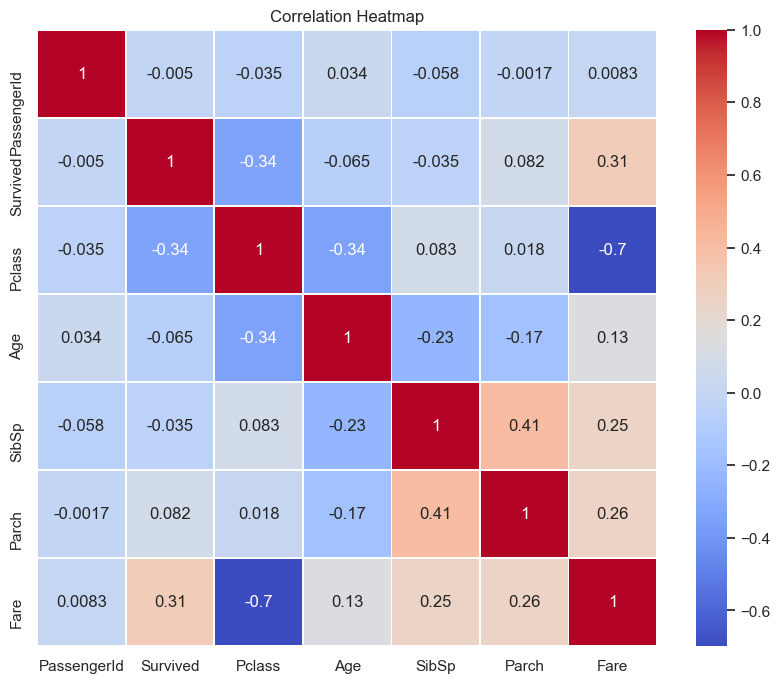

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_heatmap(data):
    # Calculate the correlation matrix
    correlation_matrix = data.corr()

    # Create a heatmap to visualize the correlations
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
    plt.title('Correlation Heatmap')
    plt.show()

# Call the function with your train_data
plot_correlation_heatmap(train_data)


Interpreting the heatmap:

Positive correlation values (closer to 1) indicate that when one variable increases, the other tends to increase as well.
Negative correlation values (closer to -1) indicate that when one variable increases, the other tends to decrease.
Correlation values closer to 0 suggest little to no linear relationship between the variables.

## Feature Transformation:

1. Create a new 'FamilySize' feature by adding 'SibSp' and 'Parch' columns.  
2. Convert 'Sex' column into numerical values (e.g., 0 for male, 1 for female).
3. Extract 'Title' from names
4. Replace uncommon titles. 

The functions make the data more suitable for analysis and modeling by structuring and transforming relevant information.

In [30]:
import pandas as pd

def create_family_size(data):
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
    return data

def convert_sex_to_numerical(data):
    data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
    return data

def extract_titles(data):
    data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    return data

def replace_uncommon_titles(data):
    title_mapping = {'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'}
    data['Title'] = data['Title'].replace(title_mapping)
    data['Title'] = data['Title'].fillna('Other')
    return data

# Apply the functions
train_data = create_family_size(train_data)
train_data = convert_sex_to_numerical(train_data)
train_data = extract_titles(train_data)
train_data = replace_uncommon_titles(train_data)


## Dropping Unnecessary Columns:

Drop 'PassengerId', 'Name' and 'Ticket' columns as they may not provide significant predictive power.

In [31]:
# Drop 'PassengerId', 'Name' and 'Ticket' columns
columns_to_drop = ['PassengerId', 'Name', 'Ticket']
train_data.drop(columns_to_drop, axis=1, inplace=True)


In [32]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Age_Category,Fare_Category,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,S,19-30,Young Adult,Low,2,Mr
1,1,1,1,38.0,1,0,71.2833,C,31-50,Adult,High,2,Mrs
2,1,3,1,26.0,0,0,7.9250,S,19-30,Young Adult,Low,1,Miss
3,1,1,1,35.0,1,0,53.1000,S,31-50,Young Adult,High,2,Mrs
4,0,3,0,35.0,0,0,8.0500,S,31-50,Young Adult,Low,1,Mr


## Performing One-Hot Encoding for Categorical Variables
One-hot encoding is a technique used to convert categorical variables into a binary matrix format, making them suitable for machine learning algorithms. In the context of your Titanic dataset, you can perform one-hot encoding for the categorical variables 'Embarked', 'Title', and 'CabinType'. Here's how you can do it using Python:

In [33]:
# Perform one-hot encoding for categorical variables
categorical_columns = ['Pclass', 'Sex', 'Embarked', 'Title', 'Age_Category', 'Fare_Category']
encoded_train_data = pd.get_dummies(train_data, columns=categorical_columns, drop_first=True)


In [34]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Age_Category,Fare_Category,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,S,19-30,Young Adult,Low,2,Mr
1,1,1,1,38.0,1,0,71.2833,C,31-50,Adult,High,2,Mrs
2,1,3,1,26.0,0,0,7.9250,S,19-30,Young Adult,Low,1,Miss
3,1,1,1,35.0,1,0,53.1000,S,31-50,Young Adult,High,2,Mrs
4,0,3,0,35.0,0,0,8.0500,S,31-50,Young Adult,Low,1,Mr


![thanks](images/thankyouimage.png)